In [184]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mtcnn import MTCNN

In [185]:
def detect_faces(img):
    # Create a detector
    detector = MTCNN()
    # Detect faces
    faces = detector.detect_faces(img)
    return faces

In [186]:
def draw_faces(img, faces):
    # Draw faces
    for face in faces:
        # Get coordinates
        x, y, w, h = face['box']
        # Draw rectangle
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    return img

In [187]:
def crop_faces(img, faces):
    # Crop faces
    crops = []
    for face in faces:
        # Get coordinates
        x, y, w, h = face['box']
        # Crop face
        crop = img[y:y+h, x:x+w]
        # Show face
        crops.append(crop)
    return crops

In [188]:
# i = 0
# cap = cv2.VideoCapture(0)
# while(True):
#     # Capture frame-by-frame
#     ret, frame = cap.read()
#     # Convert to RGB
#     frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#     # Detect faces
#     faces = detect_faces(frame)
#     # Draw faces
#     # frame = draw_faces(frame, faces)
#     # Crop faces
#     crops = crop_faces(frame, faces)
#     for crop in crops:
#         # Convert to RGB
#         crop = cv2.cvtColor(crop, cv2.COLOR_RGB2BGR)
#         cv2.imwrite(f'faces/face_{i}.jpg', crop)
#         i += 1
    
#     # Convert to BGR
#     frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
#     # Display the resulting frame
#     # cv2.imshow('frame', frame)
#     # Press Q to exit
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()

In [189]:
# read 'test' directory
import os

test_path = 'test'
test_images = os.listdir(test_path)


In [190]:
test_images = [os.path.join(test_path, img) for img in test_images]

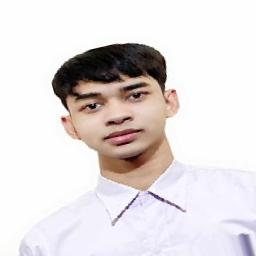

In [191]:
from PIL import Image
Image.open(test_images[0])

In [192]:
def scale_up(img):
    img_w, img_h = 224, 224
    w, h = img.size
    print(type(w), type(h))
    print(type(img_w), type(img_h))
    # check if image less than 224x224
    if w < img_w or h < img_h:
        # scale up
        img = cv2.resize(img, (img_w, img_h), interpolation=cv2.INTER_AREA)
    
    return img
    



In [194]:
num_classes = 5
indexes = [0]*(num_classes-1)
for img_path in test_images:
    # Read image
    img = cv2.imread(img_path)
    faces = detect_faces(img)
    crops = crop_faces(img, faces)
    for crop in crops:
        class_name = img_path.split('\\')[1].split('_')[1]
        new_crop = cv2.resize(crop, (224, 224), interpolation=cv2.INTER_AREA)
        cv2.imwrite(f'dataset/test_data/class-{2}/{indexes[int(class_name)]+39}.jpg', new_crop)
        indexes[int(class_name)] += 1
        print(class_name)
    # Show image
    cv2.destroyAllWindows() 


1/1 [==============================] - 0s 250ms/step
2
1/1 [==============================] - 0s 336ms/step
2
1/1 [==============================] - 0s 202ms/step
2
1/1 [==============================] - 0s 213ms/step
2
1/1 [==============================] - 0s 210ms/step
2
1/1 [==============================] - 0s 207ms/step
2
1/1 [==============================] - 0s 196ms/step
2
1/1 [==============================] - 0s 210ms/step
2
1/1 [==============================] - 0s 214ms/step
2
1/1 [==============================] - 0s 211ms/step
2
1/1 [==============================] - 0s 238ms/step
2
1/1 [==============================] - 0s 195ms/step
2
1/1 [==============================] - 0s 281ms/step
2
1/1 [==============================] - 0s 250ms/step
2
1/1 [==============================] - 0s 241ms/step
2
1/1 [==============================] - 0s 257ms/step
2
1/1 [==============================] - 0s 220ms/step
2
1/1 [==============================] - 0s 234ms/step
2
1/1 [=====